<a href="https://colab.research.google.com/github/BoshiLee/pytorch_learning/blob/main/Mean_squar_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![mse.jpg](https://imgur.com/q5teKV2.jpg)

In [1]:
!pip3 install torch

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

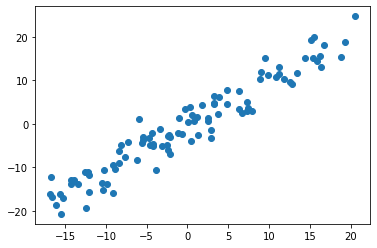

In [3]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')

In [4]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [5]:
torch.manual_seed(1)
model = LR(1, 1)

In [6]:
def get_parameters(model: LR):
  [w, b] = model.parameters()
  return (w[0][0].item(), b[0].item())

In [7]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_parameters(model)
  x1 = X.numpy()
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

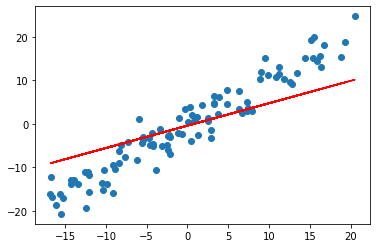

In [8]:
plot_fit('init model')

In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [10]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward() # 對 loss 微分
  optimizer.step() # 更新 Model 的參數

epoch: 0 loss: 32.982505798339844
epoch: 1 loss: 30.99850082397461
epoch: 2 loss: 29.17365074157715
epoch: 3 loss: 27.495162963867188
epoch: 4 loss: 25.95132064819336
epoch: 5 loss: 24.531288146972656
epoch: 6 loss: 23.22515869140625
epoch: 7 loss: 22.023815155029297
epoch: 8 loss: 20.918840408325195
epoch: 9 loss: 19.90247917175293
epoch: 10 loss: 18.967639923095703
epoch: 11 loss: 18.107778549194336
epoch: 12 loss: 17.3168888092041
epoch: 13 loss: 16.589445114135742
epoch: 14 loss: 15.920336723327637
epoch: 15 loss: 15.304903984069824
epoch: 16 loss: 14.738829612731934
epoch: 17 loss: 14.218162536621094
epoch: 18 loss: 13.739258766174316
epoch: 19 loss: 13.298766136169434
epoch: 20 loss: 12.89360237121582
epoch: 21 loss: 12.52093505859375
epoch: 22 loss: 12.178166389465332
epoch: 23 loss: 11.862890243530273
epoch: 24 loss: 11.572901725769043
epoch: 25 loss: 11.306170463562012
epoch: 26 loss: 11.060833930969238
epoch: 27 loss: 10.835177421569824
epoch: 28 loss: 10.6276216506958
epoch:

如果數據很奇怪的話，重啟 runtime 應該能解決

Text(0.5, 0, 'epoch')

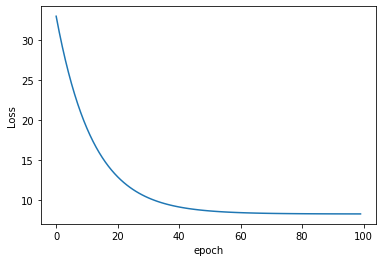

In [11]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

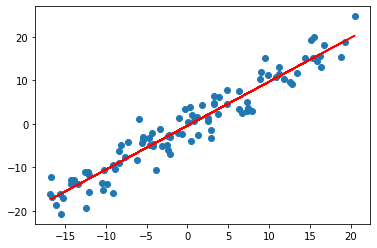

In [12]:
plot_fit('Train Model')

[Epoch, Batch size, Iteration, Learning Rate 名詞解釋](https://medium.com/%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7-%E5%80%92%E5%BA%95%E6%9C%89%E5%A4%9A%E6%99%BA%E6%85%A7/epoch-batch-size-iteration-learning-rate-b62bf6334c49)